In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Eyk1K-P4jJTjFGFhbmtX4shnXwXoWpWR2dZxVHYunUw1',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-g0kgnwkzwtijqc'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Eyk1K-P4jJTjFGFhbmtX4shnXwXoWpWR2dZxVHYunUw1',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-g0kgnwkzwtijqc'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
# dataset=pd.read_csv("/content/drive/MyDrive/Admission_Predict.csv")


In [50]:
dataset.isnull().any()


Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [51]:
dataset.fillna(dataset.mean(),inplace=True)


In [52]:
corr_matrix = dataset.corr()
corr_matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [53]:
x=dataset.iloc[:,0:8].values
y=dataset.iloc[:,8].values

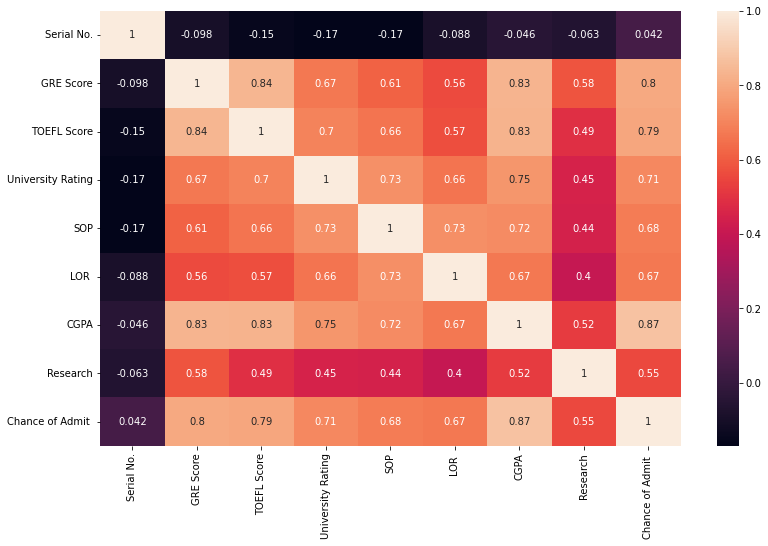

In [54]:
diag = plt.figure(figsize=(13,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

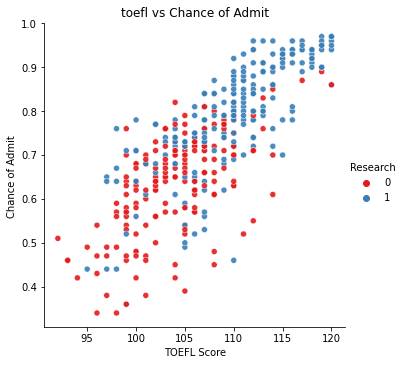

In [55]:
sns.relplot(data=dataset,x="TOEFL Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.9)
plt.title("toefl vs Chance of Admit")
plt.show()

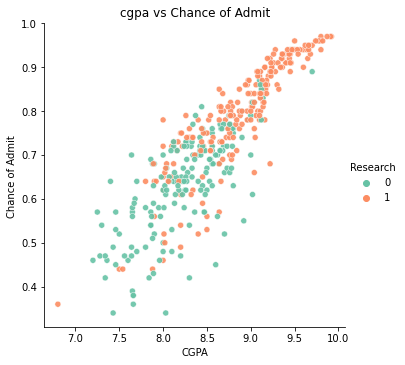

In [56]:
sns.relplot(data=dataset,x="CGPA",y="Chance of Admit ",hue="Research",
            palette="Set2",alpha=0.9)
plt.title("cgpa vs Chance of Admit")
plt.show()

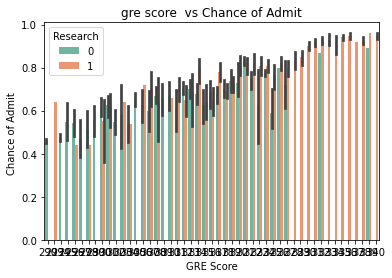

In [57]:
sns.barplot(data=dataset,x="GRE Score",y="Chance of Admit ",
            palette="Set2",hue="Research")
plt.title("gre score  vs Chance of Admit")
plt.show()

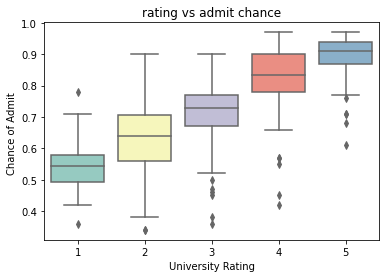

In [59]:
sns.boxplot(data=dataset,x="University Rating",y="Chance of Admit ",
            palette="Set3")
plt.title("rating vs admit chance")
plt.show()

In [60]:
x = dataset[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA", "Research"]]
y = dataset["Chance of Admit "].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
y_pred = linear_reg.predict(x_test)
r2score = r2_score(y_test,y_pred)
print("Muti linear reg score is  {:.3f}".format(r2score))

Muti linear reg score is  0.821


In [62]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
y_pred_tree = decision_tree.predict(x_test)
r2score = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's Score = {:.3f}".format(r2score))

Decision Tree Regression's Score = 0.663


In [32]:
random_forest = RandomForestRegressor(n_estimators=100,random_state=35)
random_forest.fit(x_train,y_train)
y_pred_rfr = random_forest.predict(x_test)
r2score = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2score))

Random Forest Regression's Score = 0.801


/tmp/wsuser/ipykernel_164/2231638915.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train,y_train)


In [63]:
!pip install ibm_watson_machine_learning


In [64]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "7oLxDotJPNnDIMJjITDHQK9ucfswSUDioCtIJpZxSqax"
}

client = APIClient(wml_credentials)

In [65]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [66]:
space_uid = guid_from_space_name(client, 'models')
print("Space UID = " + space_uid)

Space UID = ab74378f-2f59-4f0f-a988-8473678c95ca


In [67]:
client.set.default_space(space_uid)

'SUCCESS'

In [38]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [39]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [68]:
model_details = client.repository.store_model(model = random_forest, meta_props={
    client.repository.ModelMetaNames.NAME: "UniversityAdmissionModel",
    client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}
)

model_id = client.repository.get_model_id(model_details)

In [69]:
model_id


'9c23b37e-d14a-4bf1-8421-865cfe111eab'

In [70]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [43]:
random_forest.predict(x_train)

array([0.7891, 0.6635, 0.9687, 0.7392, 0.579 , 0.608 , 0.7954, 0.694 ,
       0.9298, 0.6488, 0.6096, 0.8371, 0.4812, 0.7433, 0.6838, 0.647 ,
       0.7649, 0.775 , 0.5745, 0.721 , 0.7033, 0.6382, 0.6807, 0.6765,
       0.7621, 0.6396, 0.6363, 0.6739, 0.6985, 0.6341, 0.735 , 0.5602,
       0.5533, 0.5363, 0.8412, 0.5376, 0.4652, 0.9254, 0.7546, 0.7866,
       0.6491, 0.6968, 0.6526, 0.4505, 0.9667, 0.8334, 0.7487, 0.7128,
       0.6458, 0.8031, 0.8435, 0.7864, 0.7699, 0.7956, 0.7398, 0.7566,
       0.8144, 0.7143, 0.8271, 0.8099, 0.6367, 0.7715, 0.5583, 0.7526,
       0.7058, 0.9412, 0.5071, 0.7261, 0.7905, 0.6857, 0.7322, 0.7241,
       0.7873, 0.9211, 0.6143, 0.8197, 0.6126, 0.949 , 0.5394, 0.7055,
       0.4434, 0.6449, 0.9016, 0.5927, 0.6461, 0.7462, 0.4727, 0.691 ,
       0.8229, 0.7044, 0.4292, 0.8042, 0.6461, 0.5192, 0.9695, 0.6007,
       0.8362, 0.6921, 0.7649, 0.943 , 0.5554, 0.8006, 0.6227, 0.6385,
       0.6277, 0.7078, 0.6798, 0.7214, 0.5761, 0.7418, 0.6651, 0.7279,
      

In [71]:
import requests
import json

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "7oLxDotJPNnDIMJjITDHQK9ucfswSUDioCtIJpZxSqax"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"field": [["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA", "Research"]], "values": [[326, 110, 2, 3.5, 4, 9.23, 1]]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/c0ef6580-f902-4096-a2d5-9762882a35a4/predictions?version=2022-11-15', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[0.8792000000000003]]}]}
